In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/BuahPI

/content/drive/MyDrive/BuahPI


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle

In [ ]:
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/BuahPI


In [ ]:
def load_rand():
    X=[]
    list_dir=[]
    dir_path='/content/drive/MyDrive/BuahPI/train'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        list_dir.append(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img_path = os.path.join(path_main,img_name)
            img=cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X, list_dir

X, list_dir = load_rand()

len(list_dir)

  0%|          | 0/6 [00:00<?, ?it/s]

freshbanana


 17%|█▋        | 1/6 [00:08<00:41,  8.37s/it]

freshapples


 33%|███▎      | 2/6 [00:10<00:19,  4.91s/it]

freshoranges


 50%|█████     | 3/6 [00:13<00:12,  4.05s/it]

rottenapples


 67%|██████▋   | 4/6 [00:17<00:07,  3.86s/it]

rottenoranges


 83%|████████▎ | 5/6 [00:20<00:03,  3.42s/it]

rottenbanana


100%|██████████| 6/6 [00:23<00:00,  3.89s/it]


6

In [ ]:
dir_path='/content/drive/MyDrive/BuahPI/train'
dir_path_test='/content/drive/MyDrive/BuahPI/test'

In [ ]:
X=load_rand()

 33%|███▎      | 2/6 [00:00<00:00, 15.89it/s]

freshbanana
freshapples
freshoranges
rottenapples


100%|██████████| 6/6 [00:00<00:00, 15.38it/s]

rottenoranges
rottenbanana


In [ ]:
len(list_dir)

6

In [ ]:
# Unpack the tuple returned by load_rand()
X_images, list_dir = load_rand()

# Now create the NumPy array from the image data
X = np.array(X_images)

X.shape

  0%|          | 0/6 [00:00<?, ?it/s]

freshbanana


 33%|███▎      | 2/6 [00:00<00:00, 13.88it/s]

freshapples
freshoranges
rottenapples


 67%|██████▋   | 4/6 [00:00<00:00, 12.53it/s]

rottenoranges
rottenbanana


100%|██████████| 6/6 [00:00<00:00, 13.30it/s]


(36, 100, 100, 3)

In [ ]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=list_dir
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

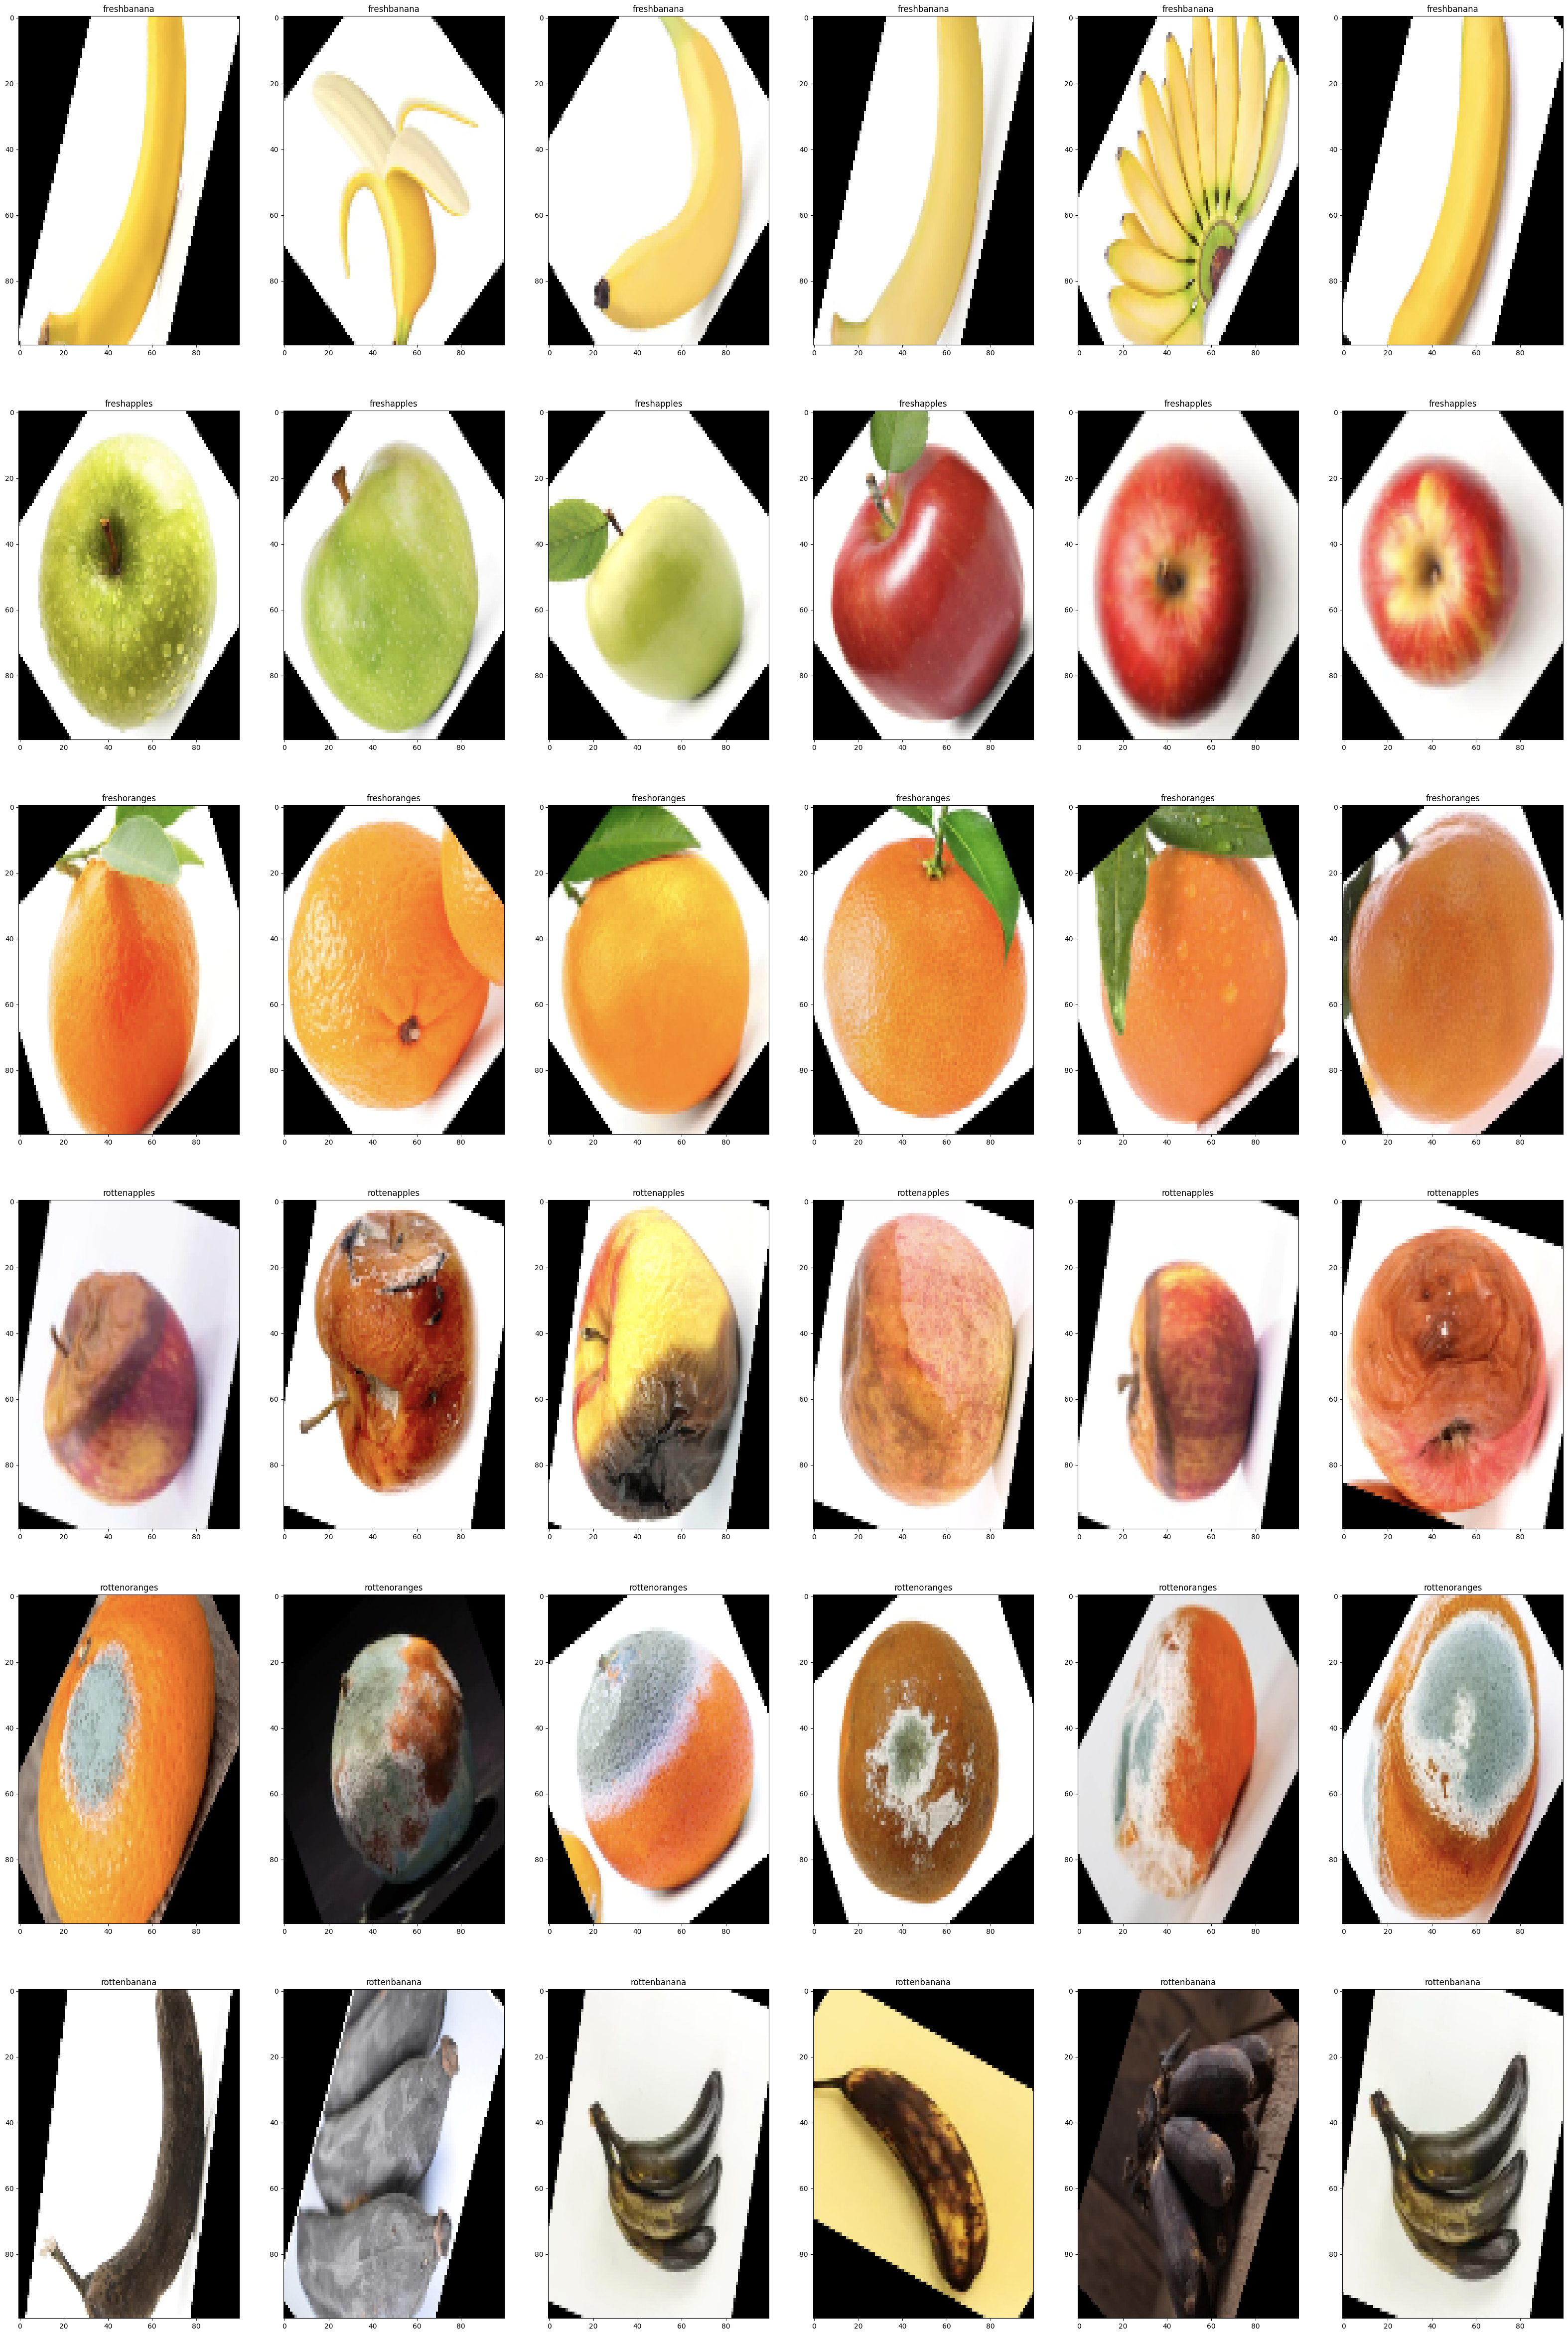

In [ ]:
show_subpot(X)

In [ ]:
del X

In [ ]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(dir_path)):
        if quality[0] in cata:
            path_main=os.path.join(dir_path,cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(dir_path,cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
X,Y=load_rottenvsfresh()

100%|██████████| 6/6 [04:49<00:00, 48.33s/it]


Shuffling your data.....


100%|██████████| 10903/10903 [00:00<00:00, 989088.28it/s]


In [ ]:
Y=np.array(Y)
X=np.array(X)

In [ ]:
y_ser=pd.Series(Y)
y_ser.value_counts()

,count
1,6163
0,4740


In [ ]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(dir_path)):
        if quality[0] in cata:
            path_main=os.path.join(dir_path_test,cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(dir_path_test,cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
!mv dataset/Test/freshtamto dataset/Test/freshtomato
!mv dataset/Test/freshpatato dataset/Test/freshpotato
!mv dataset/Test/rottentamto dataset/Test/rottentomato
!mv dataset/Test/rottenpatato dataset/Test/rottenpotato

mv: cannot stat 'dataset/Test/freshtamto': No such file or directory
mv: cannot stat 'dataset/Test/freshpatato': No such file or directory
mv: cannot stat 'dataset/Test/rottentamto': No such file or directory
mv: cannot stat 'dataset/Test/rottenpatato': No such file or directory


In [ ]:
X_val,Y_val=load_rottenvsfresh_valset()

100%|██████████| 6/6 [01:13<00:00, 12.32s/it]


Shuffling your data.....


100%|██████████| 2698/2698 [00:00<00:00, 851036.49it/s]


In [ ]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

,count
1,1534
0,1164


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, SeparableConv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
mobilenetv2_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in mobilenetv2_model.layers:
    layer.trainable = False

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(100, 100, 3)))

model.add(mobilenetv2_model)

model.add(BatchNormalization())
model.add(SeparableConv2D(128, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(128, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(SeparableConv2D(128, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(128, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

<ipython-input-22-edcf465d5490>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenetv2_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 4, 4, 1280)          │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d (SeparableConv2D)   │ (None, 4, 4, 128)           │         175,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 4, 4, 128)           │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ (None, 2, 2, 128)           │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ (None, 2, 2, 128)           │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,509,249 (9.57 MB)

 Trainable params: 248,193 (969.50 KB)

 Non-trainable params: 2,261,056 (8.63 MB)

In [ ]:
import keras

In [ ]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='modelcheckpt.keras', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

In [ ]:
X=X/255.0
X_val=X_val/255.0

In [ ]:
history=model.fit(X,Y,batch_size=3,validation_data=(X_val,Y_val),epochs= 8,
                 callbacks=[check_point])

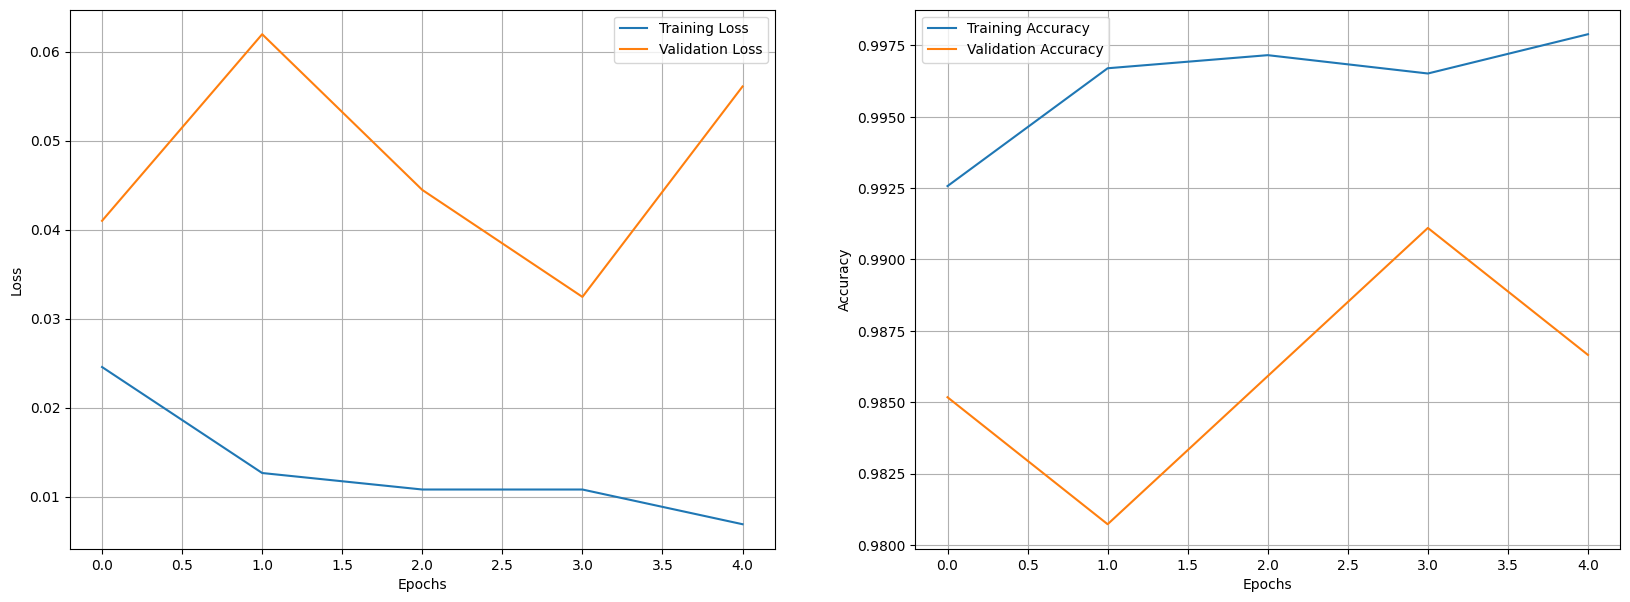

In [ ]:
plt.figure(1, figsize = (20, 7))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
model.evaluate(X_val,Y_val)

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9881 - loss: 0.0528


[0.05608430132269859, 0.9866567850112915]

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [ ]:
from keras.models import Model, load_model

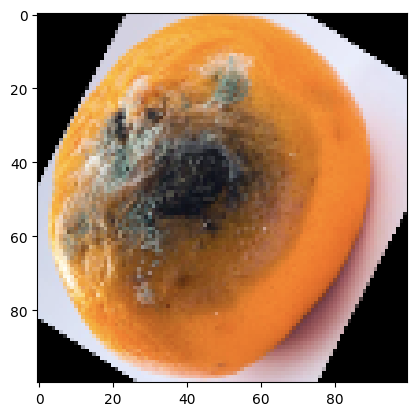

In [ ]:
plt.imshow(X_val[0])

In [ ]:
model.predict(X_val[0].reshape(1,100,100,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[1.]], dtype=float32)

Saving pisangbusuk.png to pisangbusuk (1).png
User uploaded file "pisangbusuk (1).png" with length 91535 bytes
Kondisi: busuk
Akurasi: 100.00%


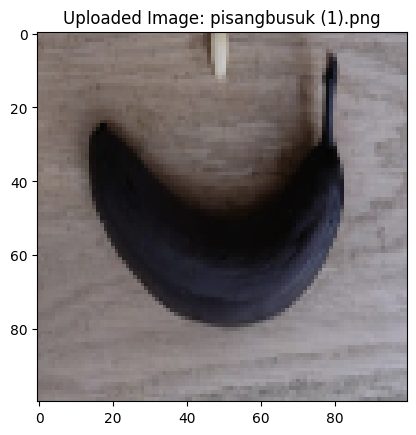

In [ ]:
from google.colab import files
from IPython.display import Image
import cv2
import tensorflow as tf
from keras.layers import TFSMLayer
import matplotlib.pyplot as plt # Import matplotlib for image display

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Load the saved model as a TFSMLayer
  model_layer = TFSMLayer('saved_model/1', call_endpoint='serving_default')

  # Read the uploaded image
  img = cv2.imread(fn)
  img = cv2.resize(img,(100,100))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Convert to RGB for matplotlib
  img = img/255.0

  # Predict using the model layer
  prediction = model_layer(img.reshape(1,100,100,3))

  # Extract the numerical prediction from the tensor
  numerical_prediction = prediction['output_0'].numpy()[0][0]

  # Determine condition and accuracy
  condition = "busuk" if numerical_prediction > 0.5 else "segar"
  accuracy = numerical_prediction if condition == "busuk" else 1 - numerical_prediction

  # Print the results
  print(f"Kondisi: {condition}")
  print(f"Akurasi: {accuracy * 100:.2f}%")

  # Display the image using matplotlib
  plt.imshow(img)
  plt.title(f"Uploaded Image: {fn}")
  plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming 'Y_val' are your true labels and 'y_pred' are your predicted labels
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)

# Define the label names
target_names = ['fresh', 'rotten']

report = classification_report(Y_val, y_pred, target_names=target_names)
print(report)

85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step
              precision    recall  f1-score   support

       fresh       0.97      0.99      0.98      1164
      rotten       0.99      0.98      0.98      1534

    accuracy                           0.98      2698
   macro avg       0.98      0.98      0.98      2698
weighted avg       0.98      0.98      0.98      2698



85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


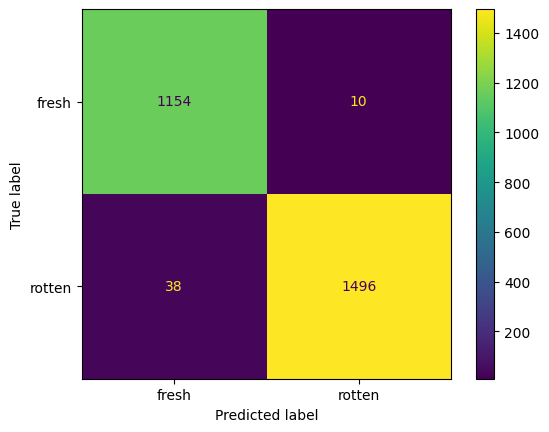

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'Y_val' are your true labels and 'y_pred' are your predicted labels
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(Y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fresh', 'rotten'])
disp.plot()
plt.show()